# COMM415DA Fundamentals of Data Science
## Course Assessment 1


This course assessment (CA1) represents 40% of the overall module assessment.

**Submission deadline:** 23 November 2022, 12noon

**Aim:** Demonstrate competence in programming with the `pandas` and `numpy`libraries.

This is an **individual exercise** and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Notes on how to use the notebook:**

1. do not change the name of this notebook, i.e. the notebook file has to be: `ca1.ipynb`
2. do not add you name or student code in the notebook or in the file name (it must be an anonymous submission)
3. do not remove or delete or add any cell in this notebook: you should work on a separate, private notebook and only when you are finished debugging then copy the function implementations in the cells of this notebook. Make sure to copy **only** the function implementation and nothing else.
4. remove the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave this command in the cell you will fail the associated test

**Submission:**

- to access this notebook you have downloaded the archive ecmm444_ca1.zip, and unziped it to a folder ecmm444_ca1
- the folder ecmm444_ca1 contains some images (.png), a notebook (.ipynb) and some other files for the datasets
- to submit your completed Jupyter notebook, save it in the folder ecmm444_ca1 without changing the file name, i.e. the notebook has to have the file name ca1.ipynb
- create a .zip archive (not any other compression format, only .zip) of the folder ecmm444_ca1 with your updated notebook 
- submit a single file, the zipped archive, using the BART submission system  


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- A hidden unit test is going to evaluate if desired properties of the required function are met. 
- If the function passes the test the associated marks are awarded, if it fails 0 marks are awarded.
- The coding style (including clarity, conciseness, appropiate use of commands and data structures, efficiency, good programming practices) will also be kept into consideration to award full marks.  
- If you make a typo error (e.g. mispelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.
- Notebooks not conforming to the required format (see notes on how to use the notebook) will be penalised.

*Although the test use a hard fail/pass strategy to assign marks, the large number of questions allows a fine grading.*

**Notes:**

Students are expected to do some autonomous readings and research to familiarise themselves with the topics of the exercises.

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function.

Students are not allowed to import additional external libraries unless explicitly stated in the question. 

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this assessment.

Questions are not strict software specifications. Students are expected to use their knowledge of the subject to interpret correctly the meaning of questions.  

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import os

# the following is used in unit testing, please ignore 
import sys
sys.path.insert(0,'..\\..\\')

# Part 1

**Aim:** Show competence in using the `pandas` library. 

In this exercise you will use the pandas library to create functions to help processing a dataset and extract some insight in the data.  

## Question 1.1  [marks 4]


Make a function `df = load_data()` to load data from the csv file `Absenteeism_at_work.csv` that you find in the same folder as this notebook and output a corresponding pandas DataFrame object.

You can find full details about the dataset in the file `UCI_ABS_TEXT.docx` (also located in the same folder).

In [2]:
def load_data():
    # Get working dir
    path = os.getcwd()
    # Add path name
    new_path = os.path.join(path , 'Absenteeism_at_work.csv')
    # Read and return the data
    return pd.read_csv(new_path , delimiter=";")

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_data()
print(df.info())
```
you should get:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education                        740 non-null    int64  
 13  Son                              740 non-null    int64  
 14  Social drinker                   740 non-null    int64  
 15  Social smoker                    740 non-null    int64  
 16  Pet                              740 non-null    int64  
 17  Weight                           740 non-null    int64  
 18  Height                           740 non-null    int64  
 19  Body mass index                  740 non-null    int64  
 20  Absenteeism time in hours        740 non-null    int64  
dtypes: float64(1), int64(20)
memory usage: 121.5 KB
None
```

In [4]:
# Just run the following code, do not modify it

df = load_data()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

## Question 1.2  [marks 4]

The column 'Reason for absence' contains a digit code for the reason for absence. We will want to add a human readable version of this information. The text correponding to each reasons for absence is available in the file `conditions.txt`.

Make a function `s_conditions = load_conditions()` that reads the information in `conditions.txt` and ouptuts a corresponding pandas Series object whose index correpsponds to the digital code in the column 'Reason for absence'.  

In [5]:
def load_conditions():
    # Get working dir
    path = os.getcwd()
    # Add path name
    new_path = os.path.join(path , 'conditions.txt')
    # Return series
    return pd.read_csv(new_path , sep = '\t' , header = None).squeeze()

In [6]:
s_conditions = load_conditions()

In [7]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 1.3  [marks 6]

We now want to map the numerical codes to their textual expressions and insert this information as a novel column in the working DataFrame. 

Make a function `insert_conditions(df, s_conditions, reference_column, new_column_name, position)` that modifies the input DataFrame `df` in-place (i.e. the function does not return anything). The function takes in input the DataFrame `df`, the Series containing the text information `s_conditions`, the column name that contains the numerical codes `reference_column`, the name of the new column that is going to be added `new_column_name` and the position, indicated in `position`, in which this new column will appear in the DataFrame.

A typical usage of this function is:
```python
df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
```

In [8]:
def insert_conditions(df, s_conditions, reference_column, new_column_name, position):
    # Preprocess s_conditions for merging
    s = s_conditions.rename(new_column_name).to_frame().reset_index().rename(columns = {'index':reference_column})
    # Merge with reference column
    col = df.merge(s , on = reference_column, how = 'left')[new_column_name]
    # inpace insertion
    df.insert(loc = position , column = new_column_name , value = col) 

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
print(df.iloc[:5][['Reason','ID', 'Reason for absence', 'Month of absence']].to_string())
```
you should get:
```
                 Reason  ID  Reason for absence  Month of absence
0   Unjustified absence  11                  26                 7
1            Not absent  36                   0                 7
2  Medical consultation   3                  23                 7
3   Diseases of the eye   7                   7                 7
4  Medical consultation  11                  23                 7
```

In [10]:
# Just run the following code, do not modify it

df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
print(df.iloc[:5][['Reason','ID', 'Reason for absence', 'Month of absence']].to_string())

                 Reason  ID  Reason for absence  Month of absence
0   Unjustified absence  11                  26                 7
1            Not absent  36                   0                 7
2  Medical consultation   3                  23                 7
3   Diseases of the eye   7                   7                 7
4  Medical consultation  11                  23                 7



## Question 1.4  [marks 8]

Some reasons for absence are associated to very few cases. Since we want to perform some statistical analysis on this data, we are going to remove the instances that correspond to those scarcely populated reasons. In addition, we might not be interested in some columns (e.g. the month of absence, the employee ID, etc), so we also want to limit our working DataFrame to a user specified list of columns. 

Make a function `df = remove(df, selected_col, n_min, col_list)` that takes in input a DataFrame `df`, a column name `selected_col` (in our case this will be 'Reason for absence'), a value `n_min` to indicate the minumum number of instances that need to be present and finally a list of column names `col_list`. 
The function returns a novel DataFrame based on `df` that contains only the columns indicated in `col_list` and that contains only instances (rows) that correspond to sufficiently populated reasons for absence, that is, if there are only 6 instances associated to the reason 'Diseases of the ear' and we choose `n_min=10`, then none of those instances will appear in the output DataFrame. 

In [11]:
def remove(df, selected_col, n_min, col_list):
    # group by to get occurences of selected_col
    df_1 = df.groupby(selected_col).agg(occurence = (selected_col , 'count')).reset_index()
    # filtering for above n_min occurences
    df_2 = df_1[df_1['occurence'] >= n_min]
    # return curtailed df, with only reqd rows and cols
    return df.merge(df_2[selected_col] , on = selected_col , how = 'inner')[col_list]

In [12]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Question 1.5  [marks 7]

In order to gain some insight on the data we want to extract some statistics about the groups of instances (rows) that share the same value for a specificed column. In our case we are interested in the instances that have the same 'Reason for absence'. 

Make a function `extract_stats(df, sel_col)` that groups the instances according to the values in `sel_col` and then extracts the counts, the mean and the standard deviation for each of those groups. The output should be a DataFrame. 

If applied to our working DataFrame `df` with `sel_col='Reason'` (assuming you haven't removed any rows) 
```
df2 = extract_stats(df, sel_col='Reason')
print(df2.iloc[:5][['ID','Age']].to_string())
```
you should obtain a DataFrame that starts like so:
```
                                    ID                         Age                     
                                 count       mean        std count       mean       std
Reason                                                                                 
Blood donation                       3  11.000000   0.000000     3  33.000000  0.000000
Conditions from perinatal period     3  19.666667   4.618802     3  37.333333  4.618802
Congenital malformations             1  17.000000        NaN     1  40.000000       NaN
Dental consultation                112  18.348214  10.762556   112  37.508929  4.873158
Diseases of the blood                1  15.000000        NaN     1  40.000000       NaN
```

In [13]:
def extract_stats(df, sel_col):
    # Setting up describe() function on grouped data
    df2 = df.groupby(sel_col).describe()
    # Selecting only count, mean and std dev to show up
    return df2[[tup for tup in list(df2.columns) if tup[1] in ('count' , 'mean' , 'std')]]

In [14]:
df2 = extract_stats(df, sel_col='Reason')
print(df2.iloc[:5][['ID','Age']].to_string())

                                       ID                          Age                     
                                    count       mean        std  count       mean       std
Reason                                                                                     
Blood donation                        3.0  11.000000   0.000000    3.0  33.000000  0.000000
Conditions from perinatal period      3.0  19.666667   4.618802    3.0  37.333333  4.618802
Congenital malformations              1.0  17.000000        NaN    1.0  40.000000       NaN
Dental consultation                 112.0  18.348214  10.762556  112.0  37.508929  4.873158
Diseases of the blood                 1.0  15.000000        NaN    1.0  40.000000       NaN


In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.6  [marks 10]

We want to analyse the various groups to see if there are statistical differences. We can visualise some statistical information for various attributes (for example `Age` or `Distance from Residence to Work`, etc) and see if those statistics are different if we group instances by `Reason` of absence. 

Make a function `plot_stats(df, selected_col, col_list, extract_stats)` to display for each column in `col_list` the statistics computed using the function `extract_stats` that you have made before, when we group data according to the values in `selected_col` (for us `selected_col='Reason'`).
For each plot, we want to represent the normal distributions that correspond to the computed means and standard deviation (you can use the function `norm` in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to plot the function for all desired values).
To get a good representation you need to work on a suitable range of values, so you need to compute the interval that ranges from the mean minus 3 standard deviations to the mean plus 3 standard deviations. Because you have multiple normal distributions to represent in a plot, you have to find the smallest value for the start of the range and the largest for the end of the range. Given that values smaller than 0 do not have any correspondance in reality, do limit the start of the range to no lower than 0.  
For clarity, do place the legend outside of the plotting area.


When running 

```
df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
df2 = remove(df, selected_col='Reason', n_min=10, col_list=['Reason','Age','Distance from Residence to Work','Work load Average/day '])
col_list = df2.columns.values[1:]
selected_col='Reason'
plot_stats(df2, selected_col, col_list, extract_stats)
```
you should get something like

<img src='plot_1.png' width=500>

In [16]:
from scipy.stats import norm
    
def plot_stats(df, selected_col, col_list, extract_stats):
    df_1 = extract_stats(df , selected_col)
    
    # fig , axes = plt.subplots(len(col_list) , 1)

    for attr in col_list:
        # print(f'{attr} , is the attribute')
        df_2 = df_1[[(attr , 'mean') , (attr , 'std')]]
        # print(f'{len(df_2)}')
        
        x_min_cap = 0
        x_min = np.inf
        x_max = 0

        x = np.linspace(0 , 1000 , 10000)
        
        fig , ax = plt.subplots()

        for idx , row in df_2.iterrows():
            mean = row[(attr , 'mean')]
            std = row[(attr , 'std')]
            # print(idx , mean , std)

            new_x_min = mean - 3*std
            new_x_max = mean + 3*std

            if x_min > new_x_min:
                x_min = new_x_min
            if x_max < new_x_max:
                x_max = new_x_max
            
            y = norm.pdf(x , loc = mean , scale = std)
            # print(f'length of y is {len(y)} and that of x is {len(x)}')
            ax.plot(x , y , label = idx);
            ax.set_xlabel(attr);
            
        plt.xlim(max(x_min , x_min_cap) , x_max);
        plt.legend(loc = "center left" , bbox_to_anchor = (1,0.5));

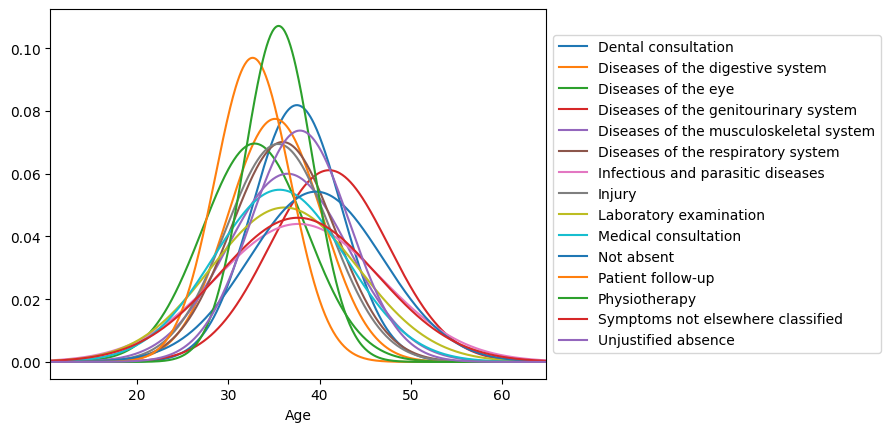

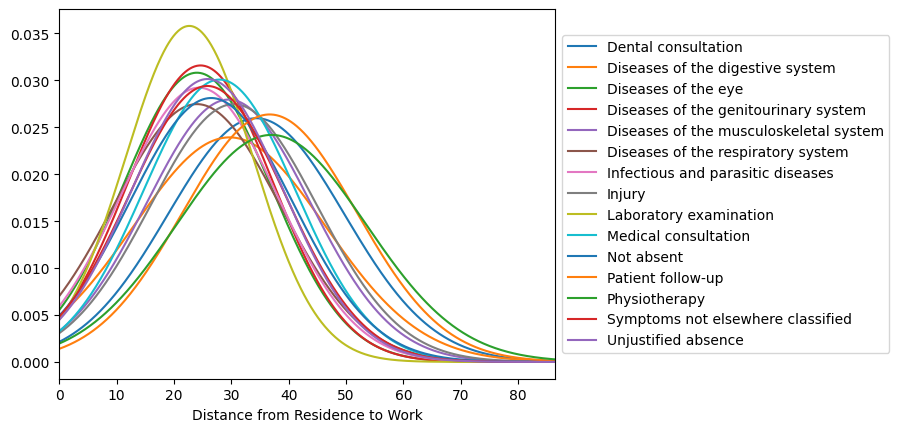

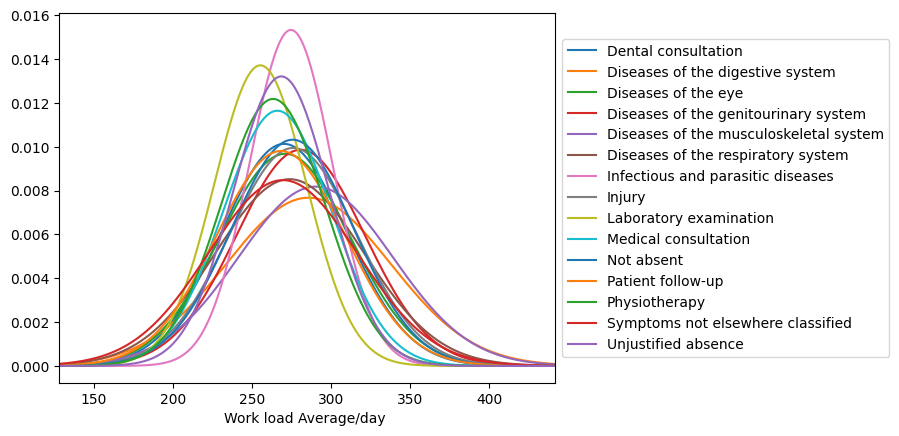

In [17]:
df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
df2 = remove(df, selected_col='Reason', n_min=10, col_list=['Reason','Age','Distance from Residence to Work','Work load Average/day '])
col_list = df2.columns.values[1:]
selected_col='Reason'
plot_stats(df2, selected_col, col_list, extract_stats)

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.7  [marks 5]

In the rest of the notebook, we will operate directly on data matrices, hence we will need a function to extract the desired NumPy arrays from a working DataFrame. 

Make a function `select_data(df, selected_col, selected_reason)` to extract the NumPy array corresponding to the instances (rows) in the input DataFrame `df` that in the column `selected_col` have the value indicated in `selected_reason` (for example `select_data(df, selected_col='Reason', selected_reason='Medical consultation')` returns the instances that in `Reason` have the value `Medical consultation`). Make sure to cast the array to have only `float` values.


In [19]:
# Extract desired numpy array from a dataframe

def select_data(df, selected_col, selected_reason):
    return df[df[selected_col] == selected_reason].drop(selected_col , axis = 1).to_numpy(dtype='float')

In [20]:
# This cell is reserved for the unit tests. Do not consider this cell. 


# Part 2

**Aim:** Show competence in using the `numpy` library. 

We now want to see if it is possible to predict what type of delay a person is likely to do. 
To simplify the problem we will consider only a binary classification task, i.e. we will choose only two specific reasons for absence. To perform the prediction we will use a simple nearest neighbor classification technique: that is, given some training instances and some test instances, we will predict that the reason of absence by considering for each test instance the closest neighbors among the instances in training and we will use a mojority vote to decide the type of reason (see [here](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm) for a simple tutorial on nearest neighbor classification). 

To implement the nearest neighbor classifier we will need some auxiliary functions.

**Terminology:**

We call *rank* the number of indices required to get individual elements of an array. A matrix requires two indices (row, column), and has thus rank 2, a vector requires one index and has rank 1, a scalar does not require any index and has rank 0. The components that make up rank are called *axes* (plural of axis). The dimension is how many elements are in a particular axis. A *shape* is a tuple whose length is the rank and elements are the dimension of each axis.

In the rest of the notebook, the term `data matrix` refers to a rank two numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

In the rest of the notebook, the term `vector` refers to a rank one numpy array. 

The functions you are required to write need to take in input and return as output such objects (i.e. not python lists).

**Note:** Do not use library functions (e.g. from `scikit`) to implement the k-NN classifier, but rather provide your own implementation.

## Question 2.1 [marks 7]

a) Make a function `X_train, y_train, X_test, y_test = make_train_test_split(X1, X2, train_size)` to generate a train/test split given a data matrix `X1` containing instances for one class (say class 0) and `X2` containing instances of the other class (say class 1). Make sure to shuffle instances so that the data matrices in output contain instances from the various classes that are randomly mixed up (but make sure to correctly associate them to their respective target!). Given the shapes `shape(X1)=(r1,c)` and `shape(X2)=(r2,c)` of the input matrices, the output matrices will have shapes `shape(X_train)=(r3,c)` and `shape(X_test)=(r4,c)` with `r1+r2=r3+r4` and `r3=train_size`. The target vectors `y_train`and `y_test` in output will be rank 1 arrays containing values in `{0,1}` indicating the corresponding classes of the instances in `X_train` and `X_test`.

In [21]:
def make_train_test_split(X1, X2, train_size):
    assert train_size < X1.shape[0] + X2.shape[0] , 'train size must be less than sum of rows of X1 & X2'
    X1 = np.concatenate([X1 , np.array([[0]]*X1.shape[0])] , axis = 1) # adding class label (for class-0)
    X2 = np.concatenate([X2 , np.array([[1]]*X2.shape[0])] , axis = 1) # adding class label (for class-1)
    # Concatenating the two datasets
    Z = np.concatenate([X1 , X2] , axis = 0) 
    np.random.shuffle(Z) # inplace shuffle
    # Train test split
    X_train = Z[:train_size , :-1]
    y_train = Z[:train_size , -1]
    X_test = Z[train_size: , :-1]
    y_test = Z[train_size: , -1]
    return X_train , y_train , X_test , y_test

In [22]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.2 [marks 6]

b) Make a function `baseline_acc(targets)` to compute *exactly* the accuracy (i.e., frequency of correct prediction as a number between 0 and 1) of a 'dumb' classifier that given the true targets (i.e., the target classes on the test set) in input in the vector `targets` predicts the class of any test instance purely at random (giving the same probability to any possible output class).


In [23]:
def baseline_acc(targets):
    # how many classes are there?
    classes = np.unique(targets)
    # random prediction among classes in targets
    pred = np.random.choice(classes , size = len(targets))
    # see how many are correct predictions
    same = np.array(targets == pred).astype('int')
    # return average correct predictions
    return sum(same)/len(same)


In [24]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.3 [marks 6]

c) Make a function `D = distance(x1, x2)` to compute the Euclidean distance between two input rank 1 vectors. 


In [25]:
def distance(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))

In [26]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.4 [marks 7]

d) Make a function `pairwise_distances(X1, X2)` to compute the Euclidean distance between every row vector in the rank 2 array `X1` and every row vector in the rank 2 array `X2`. Given the input shapes `shape(X1)=(r1,c)` and `shape(X2)=(r2,c)` the output is a rank 2 distance matrix with shape `shape(D)=(r1,r2)`.

In [27]:
def pairwise_distances(X_ref, X):
    # init empty matrix
    # result_matrix = np.zeros(shape = (X_ref.shape[0] , X.shape[0]))
    # return result_matrix
    # for i , row_i in enumerate(X_ref):
    #     for j , row_j in enumerate(X):
    #         result_matrix[i][j] = distance(row_i , row_j)
    # # return
    # return result_matrix
    return np.array([[distance(row_i , row_j) for row_i in X] for row_j in X_ref])

In [28]:
X_train = np.array(
    [
        [1,1,1],[2,2,2],[4,4,4],[3,3,3],
    ]
)
y_train = np.array(
    [0,0,1,1]
)
X_test = np.array(
    [
        [-2,-2,-2],[0,0,0],[0,4,4]
    ]
)
y_test = np.array(
    [0,0,1]
)

dist = pairwise_distances(X_test , X_train) # how far is each point in X2 (rows) from all the points in X1 (cols)
k = 1
# take the k nearest neighbouring vectors
k_nearest = [i[:k] for i in np.argsort(dist)]
# classification based on k-nearest
y_pred = np.zeros(shape = (len(y_test) ,))
for idx , order in enumerate(k_nearest):
    # y_pred[idx] = y_train[element]
    y_pred[idx] = (int(np.mean([y_train[element] for element in order]) > 0.5))

y_pred

array([0., 0., 1.])

In [29]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.5 [marks 7]

e) Make a function `knn_predictive_performance(X_train, y_train, X_test, y_test, k, pairwise_distances_func)` of the accuracy (frequency of correctly classified instances on the test set as a number between 0 and 1) of a k-nearest neighbour classifier (with number of neighbors indicated by the parameter `k`) that is trained with `X_train, y_train` and that is tested on `X_test, y_test` and that uses a function specified in `pairwise_distances_func` to compute the Euclidean distance between vectors. 

In [33]:
def knn_predictive_performance(X_train, y_train, X_test, y_test, k, pairwise_distances_func):
    pairwise_distances_func = pairwise_distances
    dist = pairwise_distances(X_test , X_train) # how far is each point in X2 (rows) from all the points in X1 (cols)
    # take the k nearest neighbouring vectors
    k_nearest = [i[:k] for i in np.argsort(dist)]
    # classification based on k-nearest
    y_pred = np.zeros(shape = (len(y_test) ,))
    for idx , order in enumerate(k_nearest):
        # y_pred[idx] = y_train[element]
        y_pred[idx] = (int(np.mean([y_train[element] for element in order]) > 0.5)) # Mean < 0.5 -> means more 0s than 1s; > 0.5 means vice versa

    # see how many are correct predictions
    same = np.array(y_test == y_pred).astype('int')
    # return average correct predictions
    return sum(same)/len(same)

In [34]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
col_list = ['Reason','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 
            'Education', 'Son', 'Social drinker', 'Pet', 'Body mass index']
df2 = remove(df, selected_col='Reason', n_min=10, col_list=col_list)
reasons = df2['Reason'].unique()
selected_reasons = [r for r in reasons if r != 'Physiotherapy']

r1 = reasons[2]
r2 = reasons[11]
X1 = select_data(df2, selected_col='Reason', selected_reason=r1)
X2 = select_data(df2, selected_col='Reason', selected_reason=r2)

n = len(X1)+len(X2)
m = n//2
X_train, y_train, X_test, y_test = make_train_test_split(X1, X2, train_size=m)
acc = knn_predictive_performance(X_train, y_train, X_test, y_test, k=3, pairwise_distances_func=pairwise_distances)
bacc = baseline_acc(y_test)
print(acc, bacc)
```
you should get an accuracy value that is larger than the baseline accuracy (most of the times)

In [37]:
# Just run the following code, do not modify it

df = load_data()
s_conditions = load_conditions()
insert_conditions(df, s_conditions, reference_column='Reason for absence', new_column_name='Reason', position=0)
col_list = ['Reason','Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 
            'Education', 'Son', 'Social drinker', 'Pet', 'Body mass index']
df2 = remove(df, selected_col='Reason', n_min=10, col_list=col_list)
reasons = df2['Reason'].unique()
selected_reasons = [r for r in reasons if r != 'Physiotherapy']

r1 = reasons[2]
r2 = reasons[11]
X1 = select_data(df2, selected_col='Reason', selected_reason=r1)
X2 = select_data(df2, selected_col='Reason', selected_reason=r2)

n = len(X1)+len(X2)
m = n//2
X_train, y_train, X_test, y_test = make_train_test_split(X1, X2, train_size=m)
acc = knn_predictive_performance(X_train, y_train, X_test, y_test, k=3, pairwise_distances_func=pairwise_distances)
bacc = baseline_acc(y_test)
print(acc, bacc)

0.6106870229007634 0.45038167938931295


# Part 3

**Aim:** Show competence in using the `pandas` library when managing time series.

In this exercise you are asked to retrieve real world financial data and perform a series of manipulations on the resulting time series. 

You will consider two signals: the Dow Jones and the Nasdaq:
- The Dow Jones Industrial Average is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States
- The NASDAQ-100 is a stock market index made up of 103 equity securities issued by 100 of the largest non-financial companies listed on the Nasdaq stock market

To work on these exercises you need to install the additional library `pandas_datareader` (e.g. by doing `pip install pandas_datareader`). 

Make sure each function that you create operates on a copy of the input dataframe and not on the dataframe itself.

## Question 3.1 (3 marks)

Make a function `make_data()` that returns a single data frame containing the signals for both the Dow Jones (symbol `DJIA`) and the Nasdaq (symbol `NASDAQ100`), for a period starting in 2001 until the first of August 2020.

You should obtain a data frame that once plotted looks similar to this:

<img src="data.png" width=400>

In [49]:
import pandas_datareader as pdr

def make_data():
    djia = pdr.get_data_fred('DJIA', start='2001', end='2020-07-31')
    nasdaq = pdr.get_data_fred('NASDAQ100', start='2001', end='2020-07-31')
    return djia.join(nasdaq , how = 'outer')

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.2 (4 marks)

Make a function `remove_missing(df)` that returns a copy of the input data frame where any record from the input data frame `df` that contains at least one missing value is removed.

In [50]:
def remove_missing(df):
    return df.dropna()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

When executing the following code:
```
print(remove_missing(make_data()))

```
you should get an output like the following:

```
                DJIA  NASDAQ100
DATE                           
2012-10-31  13096.46   2647.920
2012-11-01  13232.62   2687.520
2012-11-02  13093.16   2656.280
2012-11-05  13112.44   2672.910
2012-11-06  13245.68   2681.050
...              ...        ...
2020-07-27  26584.77  10674.375
2020-07-28  26379.28  10532.500
2020-07-29  26539.57  10662.984
2020-07-30  26313.65  10715.508
2020-07-31  26428.32  10905.883

[1951 rows x 2 columns]
```

In [51]:
print(remove_missing(make_data()))

                DJIA  NASDAQ100
DATE                           
2012-11-12  12815.08   2582.770
2012-11-13  12756.18   2561.860
2012-11-14  12570.95   2531.870
2012-11-15  12542.38   2524.360
2012-11-16  12588.31   2534.160
...              ...        ...
2020-07-27  26584.77  10674.375
2020-07-28  26379.28  10532.500
2020-07-29  26539.57  10662.984
2020-07-30  26313.65  10715.508
2020-07-31  26428.32  10905.883

[1943 rows x 2 columns]


## Question 3.3 (6 marks)

Make a function `make_coarser(df)` that returns a copy of the input data frame containing the average of values in seven day intervals.

In [ ]:
def make_coarser(df):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.4 (5 marks)

Make a function `adjust(df)` that on a copy of the input dataframe standardizes and offsets the signals in the data frame `df` as follows: 
- The standardization transformation needs to change the data to have a mean of zero and a standard deviation of 1. 
- The offset needs to add a single constant value to the data so that the minimum value in any of the columns of the data frame will be 1.

In [ ]:
def adjust(df):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

When executing the following code:
```
print(adjust(make_coarser(remove_missing(make_data()))))

```
you should get an output like the following:

```
                DJIA  NASDAQ100
DATE                           
2012-10-31  1.113103   1.297935
2012-11-07  1.038298   1.252839
2012-11-14  1.000000   1.238934
2012-11-21  1.060263   1.279212
2012-11-28  1.075445   1.299734
...              ...        ...
2020-07-01  4.010398   5.355378
2020-07-08  4.051328   5.497745
2020-07-15  4.197384   5.519594
2020-07-22  4.165374   5.455124
2020-07-29  4.122015   5.524690

[405 rows x 2 columns]
```

## Question 3.5 (5 marks)

Make a function `smooth_ratio(df, col1, col2, window, std)` that takes in input a dataframe `df`, the label of two of its columns, a `window` parameter and a `std` parameter, and does not change the input dataframe. 

The function should smooth the time series values using a moving window average. The window should be centered and have a width expressed by the `window` parameter. The average should be weighted using a Gaussian weighting scheme with standard deviation expressed by the `std` parameter.

Once the moving average has been computed for all columns in `df`, the function should return a Series containing the ratio between the smoothed values in `col1` over the smoothed values in `col2`.

For example, this function could be used as follows:

```
df = adjust(make_coarser(remove_missing(make_data())))
smooth_ratio(df, 'DJIA', 'NASDAQ100', window=4, std=2)
```

In [ ]:
def smooth_ratio(df, col1, col2, window, std):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 